In [7]:

from fastai.vision.all import *
from fastai.vision.widgets import *
from ipywidgets import *

## The US 50 Dollar and 100 Dollar Indentifier!

You have a 50 US dollar or a 100 US dollar bill on your hand, but want to make sure it is not a counterfit, all you need to do is take a picture of the bill and **upload** it to get an evaluation.
Upload an image using the upload button below the 50 dollar image, once upload is complete, the prediction result will appear below the upload button.
(Note: Only 50 US dollar or 100 US dollar bill will produce meaningful results, picture of anything else will **not** yield meaningful results.)

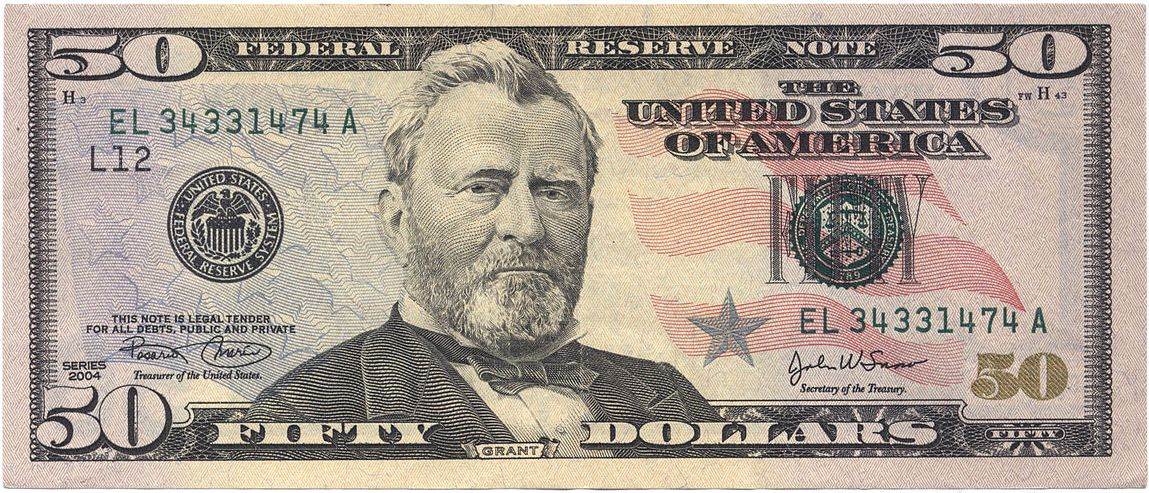

In [8]:
path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()


In [10]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'


In [11]:
btn_upload.observe(on_data_change, names=['data'])

In [12]:
display(VBox([widgets.Label('Select 50 or 100 dollar bill!'), btn_upload, out_pl, lbl_pred]))